# Classification
- Unlike regression where you predicat a continuous number, we use classification to predict a category, eg. Categorizing specific colour gradient pixal collection to identify an Object in a Picture.

## Logistic Regression
- It predicts a Categorical dependent variable from a number of Independent variables.

$$\textrm{ln} \frac{p}{1-p} = b_0 + b_1X_2 + b_3X_3 + b_nX_n$$
<img src='./class_photos/logisticReg.png' alt="Logistic regression Photo" height='300'>

Here,<br>
**p**:Probability of the dependent Variable, <br> **b<sub>n</sub>X<sub>n</sub>**:Independent varible coefficent

### Maximum Likelihood
-  It seeks to find the values of the model parameters that maximize the likelihood function, which measures how well the model explains the observed data.
<img src='./class_photos/Likelihood.png' alt='Likelihood photos' height='260'>
$$ \textrm{Likelihood} = \prod{}p(X) \times \prod{}1-p(Y) $$
where, <br> **X**: Probability of positive representation <br> 

**Y**:Probability of Negative representation
- **Diffrent Likelihood will be obtained for diffrent graphs, Maximum among those likelihood is Used.**
<img src='./class_photos/Log_reg_curves.png' alt='Diffrent Logistc regression Curve' height='300'>

### Preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print("Libraries Imported")

Libraries Imported


In [3]:
# Importing the dataset & Storing it in a variable X(Independent) and y(dependent)
dataset = pd.read_csv('./class_dataset/Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set (Ratio = 20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("Data Splitted")

Data Splitted


In [4]:
# implementing Feature Scaling on the dataset to Prevent outliers from skewing the results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
temp_X_test = X_test
X_test = sc.transform(X_test)
print("Data Scaled")

Data Scaled


## Implementing Logistic Regression

In [5]:
# Training the Logistic Regression model on the Training sets
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
print("Model Trained")

Model Trained


In [6]:
# Predicting the Test set results using the classifier
# age = 30, salary = 87000

prob = classifier.predict_proba([[30,87000]])
print("probability of [notPurchased, purchased] ",prob)

demo_data = classifier.predict([[30,87000]])
if demo_data == 0:
    print("Customer(age = 30, salary = 87000) Will Not Purchase car")
else:
    print("Customer(age = 30, salary = 87000) Will Purchase car")

probability of [notPurchased, purchased]  [[0. 1.]]
Customer(age = 30, salary = 87000) Will Purchase car


In [7]:
# counting the number of correct predictions
y_pred = classifier.predict(X_test)

unMatched = [[x,a,b] for x, a, b in zip(temp_X_test, y_pred, y_test) if a != b]

print(f' from predicted y_pred and y_test, {len(unMatched)} were not matched,\n they are:')
for obj in unMatched:
    print(f' Predicted: {obj[1]}, Actual: {obj[2]} for Age={round(obj[0][0],2)} , Salary={round(obj[0][1],2)}')


 from predicted y_pred and y_test, 6 were not matched,
 they are:
 Predicted: 0, Actual: 1 for Age=37 , Salary=79000
 Predicted: 0, Actual: 1 for Age=45 , Salary=32000
 Predicted: 0, Actual: 1 for Age=49 , Salary=28000
 Predicted: 0, Actual: 1 for Age=36 , Salary=99000
 Predicted: 0, Actual: 1 for Age=45 , Salary=22000
 Predicted: 1, Actual: 0 for Age=42 , Salary=79000


In [8]:
# determining the accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
for col in cm:print(col)

print(cm[0][0],'correct pred.',cm[0][1],"Incorrect pred."," -> for Class 0 (Not purchesed)")
print(cm[1][0],'Incorrect pred.',cm[1][1],"correct pred.", " -> for Class 1 (purchesed)")

# finding the accuracy of predictionSS
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

[57  1]
[ 5 17]
57 correct pred. 1 Incorrect pred.  -> for Class 0 (Not purchesed)
5 Incorrect pred. 17 correct pred.  -> for Class 1 (purchesed)
0.925


## Visualizing the Training and the Test Set.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


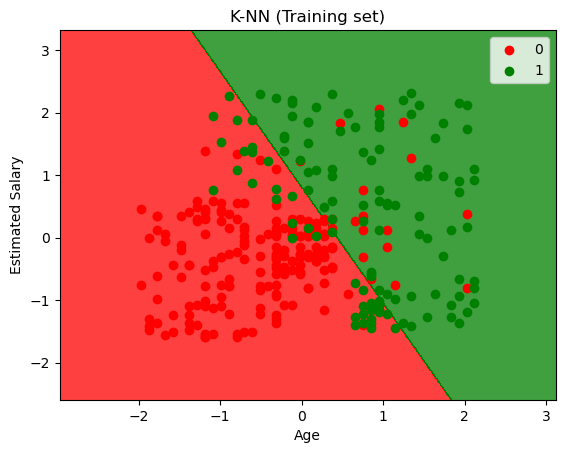

In [9]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
        c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


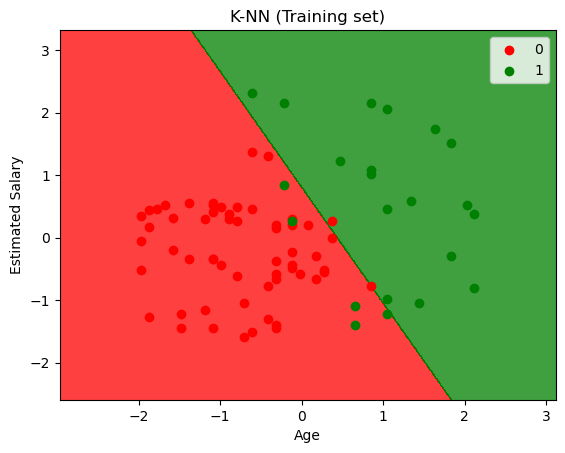

In [10]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
        c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Importent Points
- Logistics regression is a linear classifier i.e the prediction curve is always a Straigh line(2D) and plain(3D). 